#  Machine Learning - Prescriptive Modeling

##  City Segmentation: Clustering Cities by Sales Performance Using KMeans

## How can we group cities based on sales performance to uncover patterns for better sales strategy?

### 1. Overview

In a competitive business environment where sales performance can vary significantly across locations, understanding geographic sales patterns is critical for strategic planning. This project leverages KMeans Clustering, a machine learning technique, to segment cities based on their Total Sales and Units Purchased. By grouping similar-performing cities, the analysis provides actionable insights that can shape targeted marketing strategies, resource allocation, and performance improvement initiatives. The result is a visual and data-driven framework to support smarter, more localized business decisions.

### 2. Goal

- To group cities into distinct clusters based on their total sales revenue and units purchased.
- To identify underlying patterns in city-level sales performance.
- To visualize city clusters and explore performance similarities or differences.
- To provide data-driven recommendations for refining sales strategy, resource distribution, and market penetration.

###  3. Business Challenge

- Inconsistent sales performance across multiple cities with limited understanding of the root causes.
- Difficulty in prioritizing regions for sales efforts and investment.
- Inefficient marketing and sales allocation, leading to suboptimal ROI.
- Lack of segmentation intelligence for customized regional strategies.

###  4. Analysis Approach

- Data Preparation: Cleaned and grouped city-level sales and purchase data from the dataset.
- Feature Selection: Focused on Total Sales and Units Purchased as key performance indicators.
- Modeling: Applied KMeans Clustering to categorize cities into 3 distinct performance clusters.
- Visualization: Developed a scatter plot to represent cluster assignments with intuitive color mapping.
- Insight Reporting: Created a summary table to present each city’s cluster, sales, and purchase volume.
- Strategic Interpretation: Used clustering output to recommend targeted actions for high, mid, and low-performing cities.

## Importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the clean dataframe (post-ETL process)

In [11]:
df = pd.read_csv("C:\\Monthly_Sales\\cleaned_data.csv")

In [12]:
df.head(10)

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Year,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,2024,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,2024,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),600.00
4,156535,Lightning Charging Cable,2,14.95,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,2024,Mon,5,Los Angeles (CA),29.90
5,156535,iPhone,1,700.00,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,2024,Mon,5,Los Angeles (CA),700.00
6,145534,Samsung Galaxy Phone,1,650.00,2024-01-01 05:56:00,"881 Madison St, Los Angeles, CA 90001",1,January,2024,Mon,5,Los Angeles (CA),650.00
7,157179,Apple Airpods Headphones,1,150.00,2024-01-01 06:25:00,"279 Maple St, New York City, NY 10001",1,January,2024,Mon,6,New York City (NY),150.00
8,153780,Lightning Charging Cable,1,14.95,2024-01-01 06:35:00,"13 Madison St, Dallas, TX 75001",1,January,2024,Mon,6,Dallas (TX),14.95
9,144264,LG UltraGear Monitor,1,399.99,2024-01-01 06:49:00,"430 Forest St, Portland, OR 97035",1,January,2024,Mon,6,Portland (OR),399.99


### Replace 'Boston  (\rA)' with 'Boston  (MA)'

In [14]:
import re

df['City'] = df['City'].str.replace(r'Boston\s+\(\rA\)', 'Boston  (MA)', regex=True)

## Plot City Clustering using KMeans

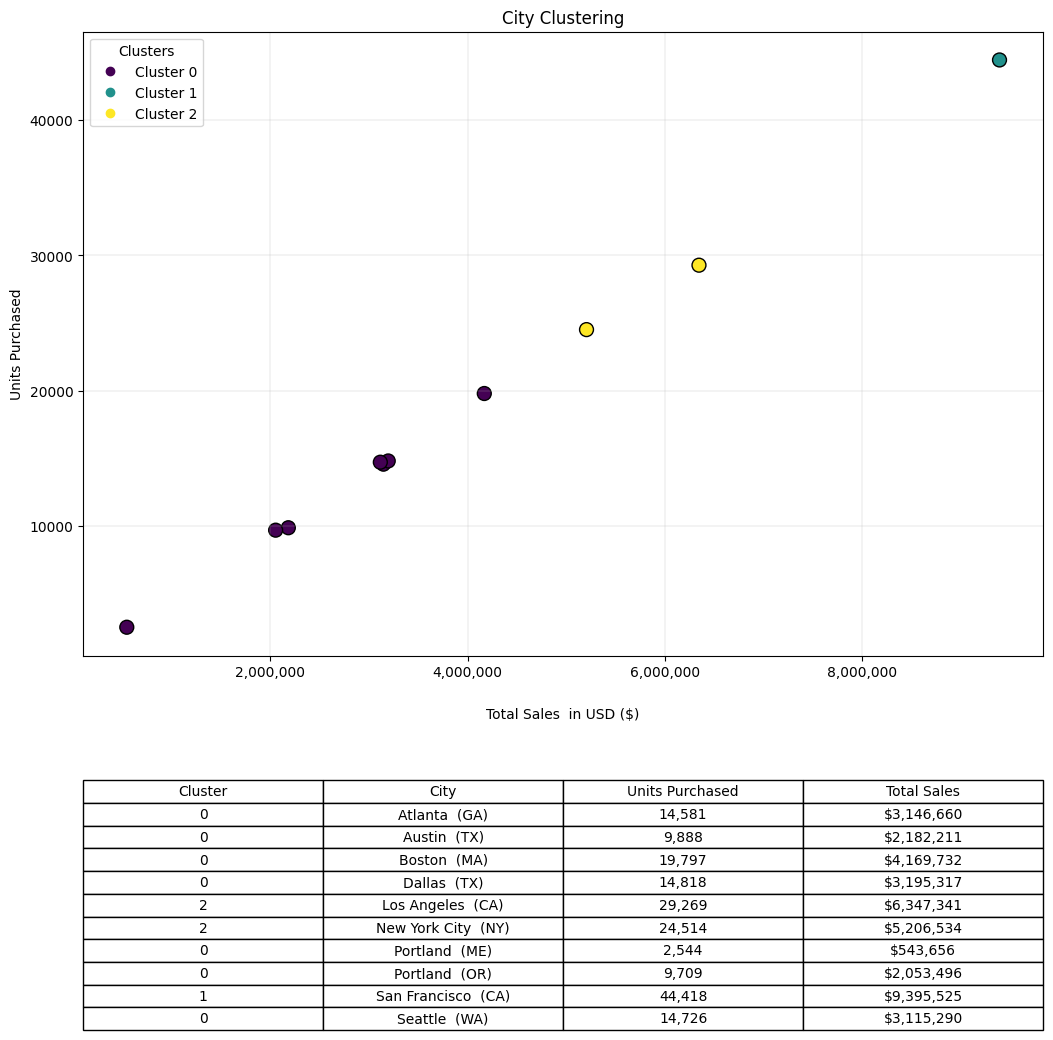

In [16]:
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans

# Deep copy to avoid modifying the original DataFrame
df_cluster = df.copy(deep=True)

# Clustering Cities Based on Total Sales
city_sales_data = df_cluster.groupby('City').agg({'Total Sales': 'sum','Units Purchased': 'sum'}).reset_index()

city_sales_data.columns = city_sales_data.columns.str.strip()
city_sales_data['City'] = city_sales_data['City'].astype(str).str.replace(r'[\r\n\t]', '', regex=True).str.strip()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
city_sales_data['Cluster'] = kmeans.fit_predict(city_sales_data[['Total Sales', 'Units Purchased']])

fig, ax = plt.subplots(figsize=(12, 8))

# Creating a Scatter Plot
df_scatter = ax.scatter(
    city_sales_data['Total Sales'],
    city_sales_data['Units Purchased'],
    c=city_sales_data['Cluster'],
    cmap='viridis',
    s=100,
    edgecolor='black'
)

# Labeling Axes and Formatting
ax.set_xlabel('Total Sales  in USD ($)', labelpad=20)    
ax.set_ylabel('Units Purchased')
ax.set_title('City Clustering')
ax.grid(linewidth=0.2)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adding Legend
handles, _ = df_scatter.legend_elements()
ax.legend(handles, [f'Cluster {i}' for i in range(len(handles))], title='Clusters')

# Preparing Tabular Data
table_data = city_sales_data[['Cluster', 'City', 'Units Purchased', 'Total Sales']].copy()
table_data['Units Purchased'] = table_data['Units Purchased'].apply(lambda x: f'{x:,.0f}')
table_data['Total Sales'] = table_data['Total Sales'].apply(lambda x: f'${x:,.0f}')

cell_text = table_data.values.tolist()
columns = table_data.columns.tolist()

table = plt.table(
    cellText=cell_text,
    colLabels=columns,
    loc='bottom',
    cellLoc='center',
    bbox=[0.0, -0.6, 1, 0.4]  # Lowered the table further
)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.subplots_adjust(left=0.1, bottom=0.10) 

plt.savefig(r"C:/Users/DELL/OneDrive - COVENANT UNIVERSITY/Desktop/1. Retail Sales Analysis and Insights/10. Clustering Cities Using the KMeans Model.png", dpi=300, bbox_inches='tight')

plt.show()

## Key Insights and Strategic Recommendations

### 1. Cluster 1 – High Sales & High Volume City

#### Interpretation:

- The Only City in this cluster, San Francisco (CA) shows strong performance in both revenue and unit sales.
- Indicates high demand, strong customer base, and effective local execution.
    

### Strategic Recommendations:

- Double down on success: Increase inventory levels, staffing, and marketing budget.
- Introduce loyalty programs to retain high-value customers.
- Launch premium products or upsell/cross-sell strategies, this city is more likely to adopt.
- Consider using this city as benchmark or pilots for new product launches.


### 2. Cluster 2 – Moderate Sales & Moderate Volume Cities

#### Interpretation:

- These cities perform reasonably well but have room for growth.
- Represents stable markets with potential to be moved into the high-performing cluster.


###  Strategic Recommendations:

- Localized promotions to drive awareness and increase repeat purchases.
- Sales training or incentive programs to boost performance.
- Monitor customer behavior and competitor activity.


### 3. Cluster 0 – Low Sales & Low Volume Cities

#### Interpretation:

- Underperforming regions with low revenue and low units sold.
- Maybe an indication of market saturation, low demand, or ineffective sales presence.
    

### Strategic Recommendations:

- Cost-efficiency measures: Evaluate whether continued investment is justified.
- Reassess market potential: Are these markets viable with a different strategy?